In [2]:
import os
import random

from PIL import Image
import torchvision.transforms as T
import cv2
import numpy as np
import kagglehub
import matplotlib.pyplot as plt

/home/a.skripnikov/ai/task1/ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
# Download latest version
path = kagglehub.dataset_download("alexattia/the-simpsons-characters-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.08G/1.08G [00:32<00:00, 35.5MB/s]

Extracting files...


Path to dataset files: /home/a.skripnikov/.cache/kagglehub/datasets/alexattia/the-simpsons-characters-dataset/versions/4


In [6]:
dataset_path = "/home/a.skripnikov/.cache/kagglehub/datasets/alexattia/the-simpsons-characters-dataset/versions/4/simpsons_dataset"

class_names = [d for d in os.listdir(dataset_path) 
              if os.path.isdir(os.path.join(dataset_path, d))]

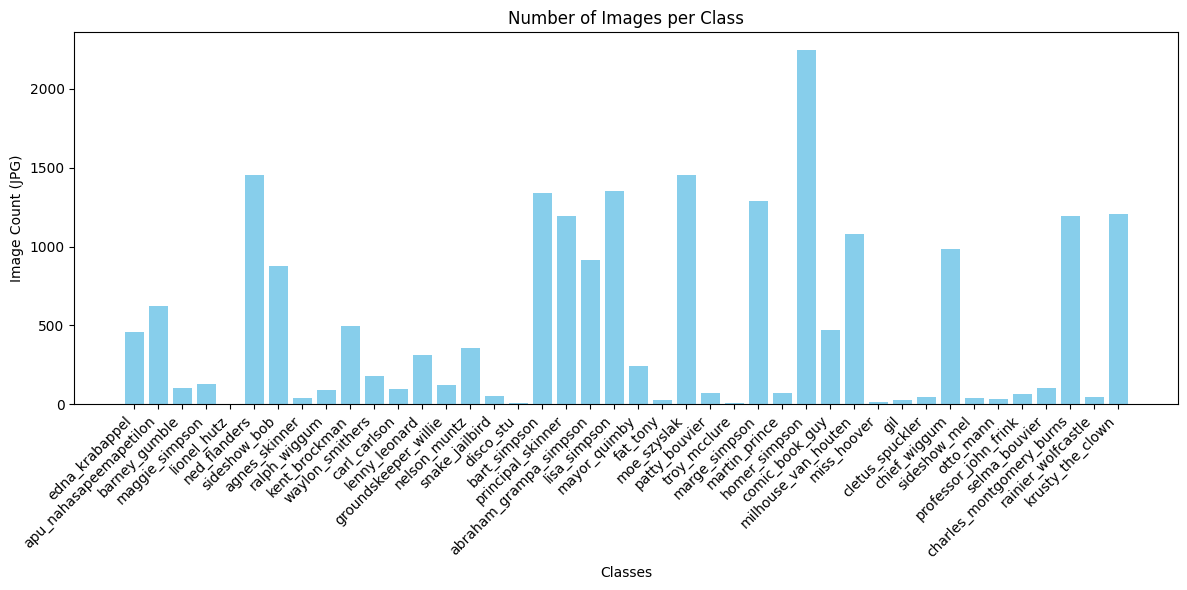

2246


In [ ]:

counts = []
class_counts = {}

for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    num_images = len([f for f in os.listdir(class_dir) 
                    if f.lower().endswith('.jpg')])
    counts.append(num_images)
    class_counts[class_name] = num_images

max_images = max(class_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(class_names, counts, color='skyblue')
plt.title("Number of Images per Class")
plt.xlabel("Classes")
plt.ylabel("Image Count (JPG)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Number of Images per Class before augmentation")
plt.show()


print(max_images)

In [3]:

transform = T.Compose([
    T.RandomHorizontalFlip(p=0.5),         
    T.RandomRotation(degrees=15),           
    T.RandomResizedCrop(size=224, scale=(0.9, 1.0)),  
    T.ToTensor()                            
])

In [38]:

for class_name, count in class_counts.items():
    if count >= max_images:
        continue
    
    class_dir = os.path.join(dataset_path, class_name)
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]
    
    original_images = []
    for img_file in image_files:
        try:
            img = Image.open(os.path.join(class_dir, img_file)).convert('RGB')
            original_images.append(img)
        except:
            continue
    
    needed = max_images - count
    
    for i in range(needed):
        img = random.choice(original_images)
        augmented = transform(img)
        augmented = T.ToPILImage()(augmented)  
        
        new_name = f"aug_{i}_.jpg"
        augmented.save(os.path.join(class_dir, new_name))

print(f"Балансировка завершена! Все классы содержат ~{max_images} изображений")

Балансировка завершена! Все классы содержат ~2246 изображений


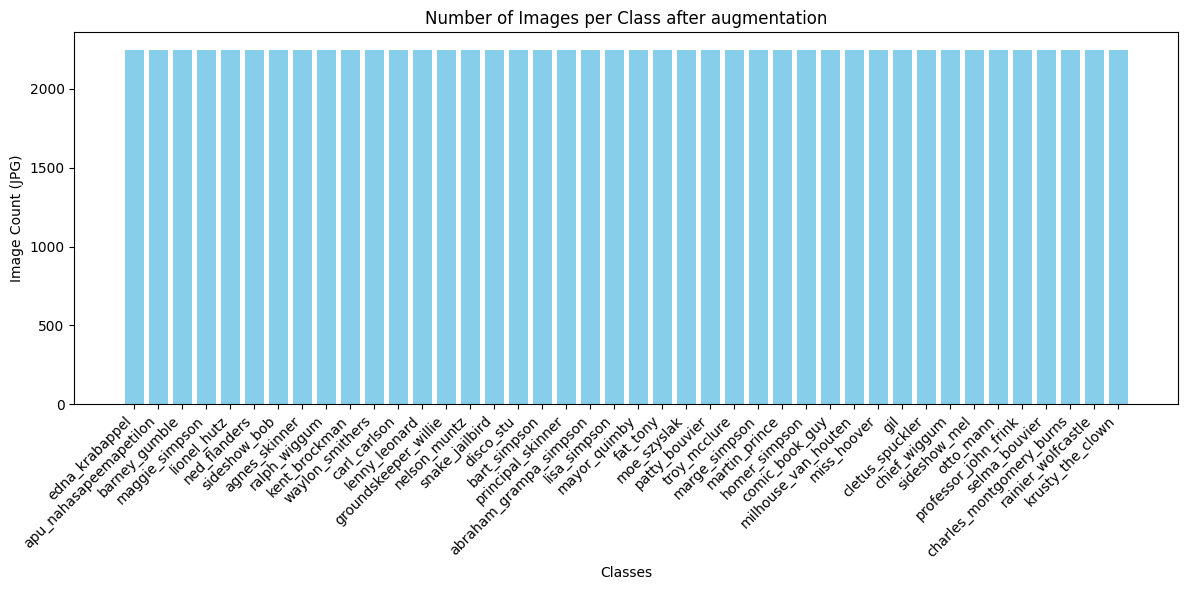

In [7]:
counts = []

for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    num_images = len([f for f in os.listdir(class_dir) 
                    if f.lower().endswith('.jpg')])
    counts.append(num_images)

plt.figure(figsize=(12, 6))
plt.bar(class_names, counts, color='skyblue')
plt.title("Number of Images per Class after augmentation")
plt.xlabel("Classes")
plt.ylabel("Image Count (JPG)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Number of Images per Class after augmentation")
plt.show()